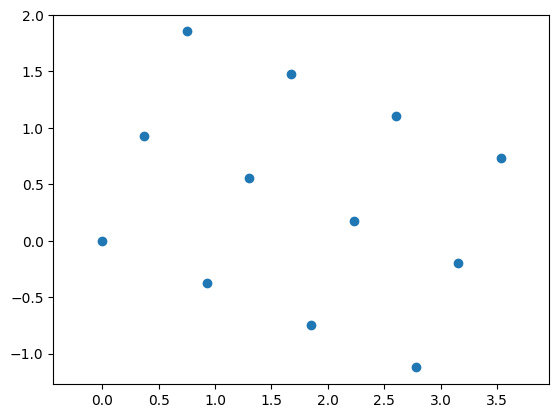

In [458]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

# rectangle of points aligned with axis
height = 16
width = 24
all_x = np.arange(0,width+1,1)
all_y = np.arange(0,height+1,1)
rect = list(itertools.product(all_x, all_y))
cx,cy = zip(*rect)
rect_ = np.array(rect)

# rotate by some angle
angle = -22  * np.pi / 180
ROTATION_2D = np.array(
    [
        [np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
])

rect_ = rect_ @ ROTATION_2D

cx,cy = rect_[:,0], rect_[:,1]

plt.axis('equal')
plt.scatter(cx,cy)





In [459]:
import numpy as np
import math 

# rearrange coordinates so we can apply the rotation
locations = np.vstack([cx, cy]).T
print(locations)
print(locations.shape)

# since we only consider counterclockwise rotation we need to compute all angles up to 180
# rotation will be precise up to a degree
angle_range = 180
angles_in_degree = np.arange(0, angle_range, 1)
angles = np.arange(0, angle_range / 180 * np.pi , angle_range / 180* np.pi / angle_range)

print("angle: ", angles)
print("angle in degrees: ", angles_in_degree)

# To align the short edge on the y axis,
# we get the smaller projection on y axis.
ROTATION = np.vstack(
    [
        -np.sin(angles),
        np.cos(angles),
    ]
)

# To align the short edge on the x axis,
# # we could use smaller projection on x axis.
# ROTATION = np.vstack(
#     [
#         np.cos(angles),
#         np.sin(angles),
#     ]
# )



# cy coordinates after all possible counter-clockwise rotation on [0,180)]
transform = locations @ ROTATION

# select max coordinates for each angle
max_y = transform.max(axis=0)
print(max_y)
# select min coordinates for each angle
min_y = transform.min(axis=0)
print(min_y)

# get the distance between the top and bottom point of the rectangle projected on y
y_proj = max_y - min_y
print(y_proj)

# sanity check -  to make sure we align the shorter edge
assert math.isclose(np.min(y_proj), height) , np.min(y_proj)

# let's find the angle for which this distance is minimum,
# as it means the rectangle is aligned with this axis.
angle_index = np.argmin(y_proj)
print("angle index:", angle_index)
print("angle in degree", angles_in_degree[angle_index])

[[ 0.          0.        ]
 [ 0.37460659  0.92718385]
 [ 0.74921319  1.85436771]
 [ 0.92718385 -0.37460659]
 [ 1.30179045  0.55257726]
 [ 1.67639704  1.47976112]
 [ 1.85436771 -0.74921319]
 [ 2.2289743   0.17797067]
 [ 2.6035809   1.10515452]
 [ 2.78155156 -1.12381978]
 [ 3.15615816 -0.19663593]
 [ 3.53076475  0.73054793]]
(12, 2)
angle:  [0.         0.01745329 0.03490659 0.05235988 0.06981317 0.08726646
 0.10471976 0.12217305 0.13962634 0.15707963 0.17453293 0.19198622
 0.20943951 0.2268928  0.2443461  0.26179939 0.27925268 0.29670597
 0.31415927 0.33161256 0.34906585 0.36651914 0.38397244 0.40142573
 0.41887902 0.43633231 0.45378561 0.4712389  0.48869219 0.50614548
 0.52359878 0.54105207 0.55850536 0.57595865 0.59341195 0.61086524
 0.62831853 0.64577182 0.66322512 0.68067841 0.6981317  0.71558499
 0.73303829 0.75049158 0.76794487 0.78539816 0.80285146 0.82030475
 0.83775804 0.85521133 0.87266463 0.89011792 0.90757121 0.9250245
 0.9424778  0.95993109 0.97738438 0.99483767 1.01229097 1

rotating by angle: -22°, which in radian is : -0.3839724354387526


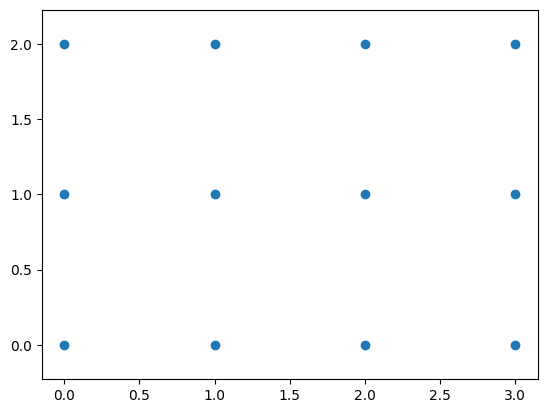

In [460]:
angle_in_degree = angles_in_degree[angle_index]
angle = angles[angle_index]

if angle_in_degree > 90:
    angle_in_degree -= 180
    angle -= np.pi
print(f"rotating by angle: {angle_in_degree}°, which in radian is : {angle}")

angle = -angle

ROTATION_2D = np.array(
    [
        [np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
])


rotated_points = locations @ ROTATION_2D
plt.axis('equal')
plt.scatter(*zip(*rotated_points))


